In [61]:
from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
iris = load_iris()

In [62]:
iris = load_iris()
X, y = iris.data, iris.target

In [63]:
target=y.reshape((y.shape[0],1))

In [64]:
X_Final = np.delete(X, [0, 1], axis=1)

### Afficher les données

In [65]:
# X_Final,target

### Echantillonner les données

In [66]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_Final, target, test_size = 0.2, stratify=target, random_state=42 ) #Tjs utiliser stratify sur classif

In [67]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((120, 2), (30, 2), (120, 1), (30, 1))

### Entrainer le modèle avec max_depth=3, puis max_depth=4 jusqu'à max_depth=10

In [68]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree


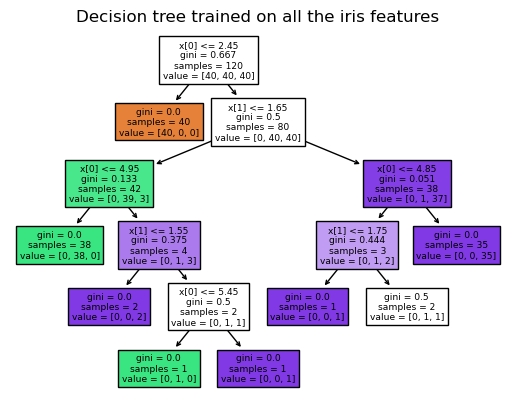

In [69]:
plt.figure()
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(xtrain, ytrain)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()


In [70]:
data = load_iris(as_frame=True)


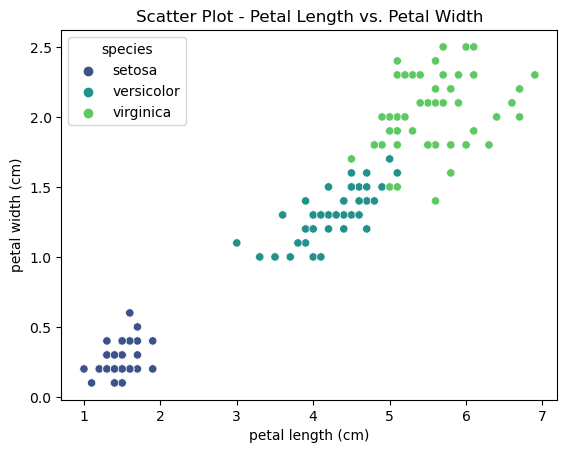

In [71]:
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
# Ajouter la colonne 'species' au DataFrame avec les noms des espèces
df['species'] = [target_names[i] for i in target]

# Créer un scatter plot avec Seaborn
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=df, palette='viridis')

# Afficher le plot
plt.title('Scatter Plot - Petal Length vs. Petal Width')
plt.show()

In [72]:
from sklearn.metrics import accuracy_score

# Define a list of max_depth values to try
max_depth_values = list(range(3, 11))

# Train decision tree models with different max_depth values
for max_depth in max_depth_values:
    # Create and train the decision tree model
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_model.fit(xtrain, ytrain)
    
    # Make predictions on the training set
    y_train_pred = dt_model.predict(xtrain)
    # Make predictions on the test set
    y_test_pred = dt_model.predict(xtest)
    
    # Calculate and print the accuracy on the training set
    train_accuracy = accuracy_score(ytrain, y_train_pred)
    print(f"Max Depth = {max_depth}, Training Accuracy = {train_accuracy:.4f}")
    
    # Calculate and print the accuracy on the test set
    test_accuracy = accuracy_score(ytest, y_test_pred)
    print(f"Max Depth = {max_depth}, Test Accuracy = {test_accuracy:.4f}")


Max Depth = 3, Training Accuracy = 0.9833
Max Depth = 3, Test Accuracy = 0.9667
Max Depth = 4, Training Accuracy = 0.9833
Max Depth = 4, Test Accuracy = 0.9333
Max Depth = 5, Training Accuracy = 0.9917
Max Depth = 5, Test Accuracy = 0.9333
Max Depth = 6, Training Accuracy = 0.9917
Max Depth = 6, Test Accuracy = 0.9333
Max Depth = 7, Training Accuracy = 0.9917
Max Depth = 7, Test Accuracy = 0.9333
Max Depth = 8, Training Accuracy = 0.9917
Max Depth = 8, Test Accuracy = 0.9333
Max Depth = 9, Training Accuracy = 0.9917
Max Depth = 9, Test Accuracy = 0.9333
Max Depth = 10, Training Accuracy = 0.9917
Max Depth = 10, Test Accuracy = 0.9333


In [73]:
# Plus la profondeur de l'arbre augmente, notre modele devient plus complexe et la précision sur l'ensemble d'apprentissage augmente.
# inversement la performance sur notre jet de test diminue,ceci montre qu'il ya un surapprentissage. 
# in va falloir trouver un score qui offre la meilleure performance de généralisation sur des données test(inconnues)
# Pour éviter le surapprentissage, il est préférable de choisir un score qui offre la meilleure précision sur l'ensemble de test et aussi une hautre 
# precision sur les valeurs de train 